<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Unsupervised Learning - KMeans - Wine
</b></font> </br></p>

---


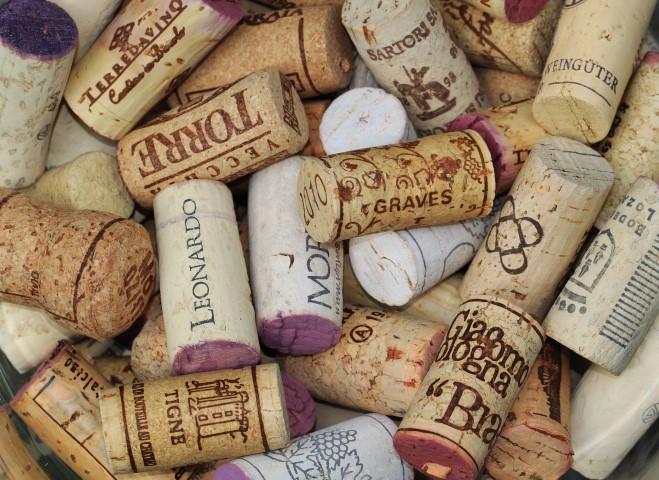

Bild von <a href="https://pixabay.com/de/users/cocoparisienne-127419/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=360370">Anja</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=360370">Pixabay</a>

# **1 <font color='orange'>|</font>  Understand**

---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

In der obigen Referenz wurden zwei Datensätze erstellt, die Rot- und Weißweinproben verwendeten. Die Eingaben umfassen objektive Tests (z. B. PH-Werte) und die Ausgabe basiert auf sensorischen Daten (Median von mindestens 3 Bewertungen durch Weinexperten). Jeder Experte bewertete die Weinqualität zwischen 0 (sehr schlecht) und 10 (sehr ausgezeichnet).

[DataSet](https://www.openml.org/search?type=data&status=active&id=287)

[Info](https://www.openml.org/search?type=data&status=active&id=287)



<p><font color='black' size="5">
Daten laden
</font></p>



In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
df = fetch_openml(parser='auto', data_id=287)
data = df.data.copy()
target = df.target.copy()
print (df.data.shape, df.target.shape, df.feature_names)

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
df.frame.info()

In [ ]:
df.frame.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile.acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric.acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual.sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free.sulfur.dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total.sulfur.dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [ ]:
df.frame.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile.acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric.acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual.sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free.sulfur.dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total.sulfur.dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [ ]:
df.frame['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Plotly
</font></p>

In [ ]:
import plotly.express as px
import plotly.subplots as sp

In [ ]:
# 3 Boxplots
title_ = 'residual.sugar'
box1 = px.box(data['residual.sugar'], title=title_, width=600, height=600)

title_ = 'free.sulfur.dioxide'
box2 = px.box(data['free.sulfur.dioxide'], title=title_, width=600, height=600)

title_ = 'total.sulfur.dioxide'
box3 = px.box(data['total.sulfur.dioxide'], title=title_, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('residual.sugar', 'free.sulfur.dioxide', 'total.sulfur.dioxide'))

for trace in box1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in box2.data:
    fig.add_trace(trace, row=1, col=2)

for trace in box3.data:
    fig.add_trace(trace, row=1, col=3)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text='Box-Plots')

# Plot anzeigen
fig.show()

In [ ]:
# Scattergramm
title_ = 'Wine Quality'
px.scatter(df.frame, x='alcohol', y='density', color='quality', labels={"alcohol": "Alcohol","density": "Density"}, title=title_, width=1000, height=500)

In [ ]:
# Scatter Matrix
px.scatter_matrix(df.frame, dimensions=df.frame.columns, opacity=0.7, color=target)

# **2 <font color='orange'>|</font> Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data[num_col] = MinMaxScaler().fit_transform(data[num_col])

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Train-Test-Split erstellen</br>
✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>


<p><font color='black' size="5">
Modellauswahl & Training
</font></p>

<p><font size="3">


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7, n_init=100)
model.fit(data)

KMeans(n_clusters=7, n_init=100)

# **4 <font color='orange'>|</font> Evaluate**
---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>

In [ ]:
model.predict(data)

array([1, 1, 1, ..., 6, 0, 0], dtype=int32)

In [ ]:
prediction = pd.DataFrame(model.labels_)

In [ ]:
prediction.value_counts()

2    1650
6    1219
0    1046
4     985
1     738
3     507
5     352
dtype: int64

<p><font color='black' size="5">
Silhouettenkoeffizient
</font></p>

In [ ]:
 from sklearn.metrics import silhouette_score
 s_score = silhouette_score(data, model.labels_, metric='euclidean')
 print(f'Silhouettenkoeffizient: {s_score:0.2f}')

Silhouettenkoeffizient: 0.19


<p><font color='black' size="5">
Aufbau Analysewürfel
</font></p>

In [ ]:
# Übernahme der Testdaten
cube = df.frame.copy()
# Übernahem Target real & predict
cube['predict'] = prediction

In [ ]:
# Erstellung 2D Features über Dimensionsreduktion PCA - unsupervised
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(data)
pca_df = pd.DataFrame(pca)

# Cube um pca erweitern
cube['PCA1'] = pca_df[0]
cube['PCA2'] = pca_df[1]

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda = lda.fit_transform(data, target)
lda_df = pd.DataFrame(lda)

# Cube um lda erweitern
cube['LDA1'] = lda_df[0]
cube['LDA2'] = lda_df[1]

In [ ]:
type(lda_df)

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [ ]:
cube['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
cube['predict'].value_counts()

0    1650
5    1220
1    1050
2     985
3     738
6     495
4     359
Name: predict, dtype: int64

<p><font color='black' size="5">
Matching quality vs predict
</font></p>

In [ ]:
import plotly.express as px
import plotly.subplots as sp

title_ = 'Streupunktdiagramm'
# Berechnen der Anzahl von x=y
cube['count'] = cube.groupby(['quality', 'predict'])['quality'].transform('count')

# Erstellen des Scatterplots mit Größe der Punkte abhängig von der Anzahl von x=y
fig = px.scatter(cube, x='quality', y='predict', size='count', width=600, height=600)

# Anpassen der Größe der Punkte im Scatterplot
fig.update_traces(marker=dict(sizemode='area', sizeref=0.7))

# Anzeigen des Scatterplots
fig.show()

In [ ]:
cube['predict_t'] = cube['predict']
cube.predict_t.replace([0,1,2,3,4,5,6], [5,7,8,4,6,6,8], inplace = True)

In [ ]:
# 2 x Scatterplots
title_ = 'Streupunktdiagramm PCA quality vs predict'
img1 = px.scatter(cube, x='PCA1', y='PCA2', color='quality', width=600, height=600)

title_ = 'Streupunktdiagramm predict'
img2 = px.scatter(cube, x='PCA1', y='PCA2', color='predict_t', width=600, height=600)

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Scatterplot real', 'Scatterplot predict'))

for trace in img1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in img2.data:
    fig.add_trace(trace, row=1, col=2)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text=title_)

# Plot anzeigen
fig.show()

In [ ]:
# 2 x Scatterplots
title_ = 'Streupunktdiagramm LDA quality vs predict'
img1 = px.scatter(cube, x='LDA1', y='LDA2', color='quality', width=600, height=600)

img2 = px.scatter(cube, x='LDA1', y='LDA2', color='predict_t', width=600, height=600)

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Scatterplot real', 'Scatterplot predict'))

for trace in img1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in img2.data:
    fig.add_trace(trace, row=1, col=2)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text=title_)

# Plot anzeigen
fig.show()

<p><font color='black' size="5">
Homogenität & Vollständigkeit
</font></p>

In [ ]:
from sklearn import metrics
print ('Metrics:')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(cube.quality, cube.predict_t))
print("Completeness: %0.3f" % metrics.completeness_score(cube.quality, cube.predict_t))

Metrics:
Homogeneity: 0.088
Completeness: 0.110


# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>